In [25]:
import pandas as pd
import matplotlib as plt

In [3]:
denver_sales_df = pd.read_csv("real_property_sales_and_transfers.csv",low_memory=False)
res_char_df= pd.read_csv('real_property_residential_characteristics1.csv', low_memory=False)

In [4]:
# res_char_df.dtypes

In [5]:
denver_sales_df.head()

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
0,1.020100e+10,2018157240,WD,2018,1203,20181211,277696,"ACOSTA,ANTHONY K",VACHOVSKY FAMILY TRUST,H,52.0,193,ROWHOUSE,4,GREEN VALLEY,163087844
1,1.020101e+10,2018114222,WD,2018,906,20180907,270000,"GALLEGOS,PATRICK","POUNDS,CHRISTOPHER L",H,52.0,193,ROWHOUSE,4,GREEN VALLEY,163087941
2,1.020102e+10,2018073180,WD,2018,608,20180613,50000,TLL INVESTMENTS LLC,"NELSON,NICK",O,41.0,103,CONDOMINIUM,4,GREEN VALLEY,163341651
3,1.020102e+10,2018143037,WD,2018,1101,20181105,230000,"NELSON,NICK",NEW DIRECTION TR COMPANY FBO,O,41.0,103,CONDOMINIUM,4,GREEN VALLEY,163341651
4,1.020104e+10,2018061274,WD,2018,521,20180523,242000,"PHARRIS,DAVID","HAMMOND,FLORVIOLETA",O,41.0,103,CONDOMINIUM,4,GREEN VALLEY,163400101


In [10]:
# THIS STARTS ONE HOT ENCODING. SPECIFYING THE FEATURE I CARE ABOUT  
z = denver_sales_df.D_CLASS_CN

In [11]:
from sklearn.preprocessing import LabelEncoder
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(z)
encoded_z = label_encoder.transform(z)

In [12]:
from keras.utils import to_categorical

In [13]:
one_hot_z = to_categorical(encoded_z)
dclass_encoded_df = pd.DataFrame(one_hot_z)
denver_sales_df['CONDO'] = dclass_encoded_df[0]
denver_sales_df['ROW_HOUSE'] = dclass_encoded_df[1]
denver_sales_df['SINGLE_FAMILY'] = dclass_encoded_df[2]


In [14]:
# res_char_df.head(5)

In [15]:
sales_res_char_df = pd.merge(denver_sales_df,res_char_df[['PIN','AREA_ABG','BED_RMS','FULL_B','HLF_B','CCYRBLT','LAND_SQFT']],how='inner',on='PIN')

sales_res_char_df.head()

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,...,PIN,CONDO,ROW_HOUSE,SINGLE_FAMILY,AREA_ABG,BED_RMS,FULL_B,HLF_B,CCYRBLT,LAND_SQFT
0,1.020100e+10,2018157240,WD,2018,1203,20181211,277696,"ACOSTA,ANTHONY K",VACHOVSKY FAMILY TRUST,H,...,163087844,0.0,1.0,0.0,1716,3,2.0,1.0,2003.0,2760
1,1.020101e+10,2018114222,WD,2018,906,20180907,270000,"GALLEGOS,PATRICK","POUNDS,CHRISTOPHER L",H,...,163087941,0.0,1.0,0.0,1540,3,2.0,1.0,2003.0,1840
2,1.020102e+10,2018073180,WD,2018,608,20180613,50000,TLL INVESTMENTS LLC,"NELSON,NICK",O,...,163341651,1.0,0.0,0.0,1226,2,2.0,1.0,2005.0,3617
3,1.020102e+10,2018143037,WD,2018,1101,20181105,230000,"NELSON,NICK",NEW DIRECTION TR COMPANY FBO,O,...,163341651,1.0,0.0,0.0,1226,2,2.0,1.0,2005.0,3617
4,1.020104e+10,2018061274,WD,2018,521,20180523,242000,"PHARRIS,DAVID","HAMMOND,FLORVIOLETA",O,...,163400101,1.0,0.0,0.0,1226,2,2.0,1.0,2006.0,3617


In [16]:
sales_res_char_df['AGE'] = 2019 - sales_res_char_df['CCYRBLT']
sales_res_char_df.head()


,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,...,CONDO,ROW_HOUSE,SINGLE_FAMILY,AREA_ABG,BED_RMS,FULL_B,HLF_B,CCYRBLT,LAND_SQFT,AGE
0,1.020100e+10,2018157240,WD,2018,1203,20181211,277696,"ACOSTA,ANTHONY K",VACHOVSKY FAMILY TRUST,H,...,0.0,1.0,0.0,1716,3,2.0,1.0,2003.0,2760,16.0
1,1.020101e+10,2018114222,WD,2018,906,20180907,270000,"GALLEGOS,PATRICK","POUNDS,CHRISTOPHER L",H,...,0.0,1.0,0.0,1540,3,2.0,1.0,2003.0,1840,16.0
2,1.020102e+10,2018073180,WD,2018,608,20180613,50000,TLL INVESTMENTS LLC,"NELSON,NICK",O,...,1.0,0.0,0.0,1226,2,2.0,1.0,2005.0,3617,14.0
3,1.020102e+10,2018143037,WD,2018,1101,20181105,230000,"NELSON,NICK",NEW DIRECTION TR COMPANY FBO,O,...,1.0,0.0,0.0,1226,2,2.0,1.0,2005.0,3617,14.0
4,1.020104e+10,2018061274,WD,2018,521,20180523,242000,"PHARRIS,DAVID","HAMMOND,FLORVIOLETA",O,...,1.0,0.0,0.0,1226,2,2.0,1.0,2006.0,3617,13.0


In [17]:
grouped_neighborhoods = sales_res_char_df.groupby('NBHD_1_CN')

In [18]:
newdf = grouped_neighborhoods.count().reset_index()
neighborhoods = pd.Series(newdf.NBHD_1_CN)
neighborhoods[2]


'AURARIA'

In [19]:
neighborhoods.head()

0    ARAPAHOE SQUARE
1        ATHMAR PARK
2            AURARIA
3           BALLPARK
4             BARNUM
Name: NBHD_1_CN, dtype: object

In [20]:
# THIS CODE WAS TESTING EXPORTING EACH NEW DATAFRAME IN THE FOR LOOP TO CSV.  THIS WORKED.
# for neighborhood in neighborhoods:
#     pd.DataFrame(sales_res_char_df.set_index('NBHD_1_CN').filter(like=neighborhood,axis=0)).to_csv(f"{neighborhood}.csv")
    
   

In [21]:
# DON'T NEED THIS CODE
# features_df = pd.DataFrame(sales_res_char_df,columns=['NBHD_1_CN','PIN','SALE_PRICE','SALE_YEAR','AREA_ABG','BED_RMS','FULL_B','HLF_B','CCYRBLT','LAND_SQFT','D_CLASS_CN','CONDO','ROW_HOUSE','SINGLE_FAMILY'])
# features_df['AGE'] = 2019 - features_df['CCYRBLT']
# features_df.head()

In [22]:
results_df = []
for neighborhood_name in neighborhoods:
#     print(f'Now training for {neighborhood_name} ')
    neighborhood_df = sales_res_char_df.set_index('NBHD_1_CN').loc[neighborhood_name]#pd.DataFrame(.filter(like=neighborhood,axis=0))
#     sales_res_char_df.set_index('NBHD_1_CN').loc[neighborhood_name].to_csv(f'Neighborhood_Sales/{neighborhood_name}.csv')
    y = neighborhood_df.SALE_PRICE.values.reshape(-1, 1)
    X = neighborhood_df[['AREA_ABG','BED_RMS','AGE','FULL_B','LAND_SQFT','CONDO','ROW_HOUSE','SINGLE_FAMILY']]
    from sklearn.datasets import make_regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X,y)
#     from joblib import dump
#     dump(model, f'{neighborhood_name}.joblib')
#     results_df.append([neighborhood_name,model.score(X,y)], ignore_index=True)
    results_df.append([neighborhood_name,model.score(X,y)])
    

In [47]:
model_results = pd.DataFrame(results_df,columns=['Neighborhood','Score']).sort_values(by='Score',ascending=False).set_index('Neighborhood')#.to_csv('Neighborhood_results.csv')

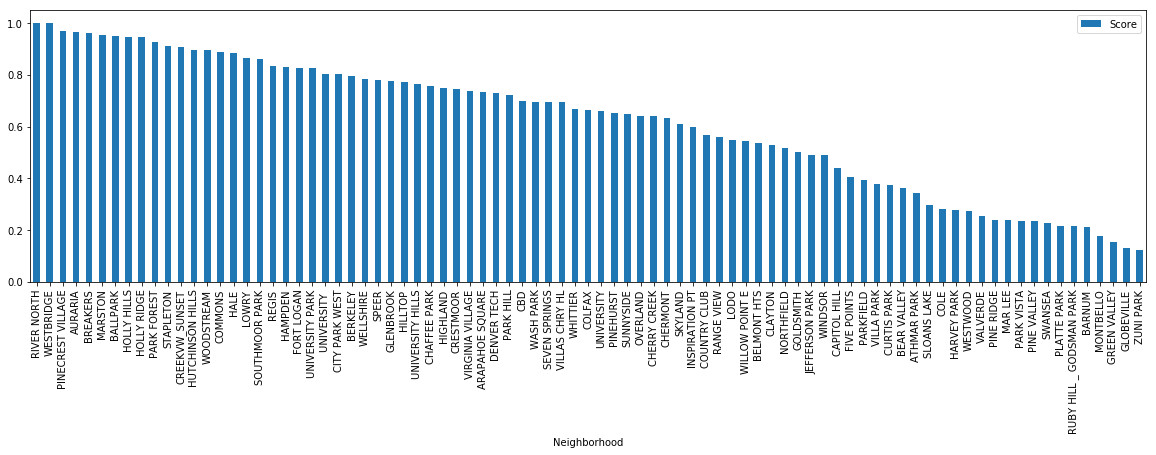

In [53]:
model_results.plot.bar(figsize=(20,5))